In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
gender_map = {'male':1,'female':2}
titanic_df['Sex'] = titanic_df['Sex'].map(gender_map)
titanic_df_filtered = titanic_df.dropna()
class_labels = LabelEncoder()
titanic_df_filtered['embarked'] = class_labels.fit_transform(titanic_df_filtered['Embarked'].values)
titanic_df_filtered
titanic_df_filtered['name'] = class_labels.fit_transform(titanic_df_filtered['Name'].values)
titanic_df_filtered['ticket'] = class_labels.fit_transform(titanic_df_filtered['Ticket'].values)
titanic_df_filtered['cabin'] = class_labels.fit_transform(titanic_df_filtered['Cabin'].values)


titanic_df_filtered = titanic_df_filtered.drop('Name', axis=1)
titanic_df_filtered = titanic_df_filtered.drop('Ticket', axis=1)
titanic_df_filtered = titanic_df_filtered.drop('Cabin', axis=1)
titanic_df_filtered = titanic_df_filtered.drop('Embarked', axis=1)

titanic_df_filtered

C:\Users\toriw\AppData\Local\Temp\ipykernel_24116\3922792188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_filtered['embarked'] = class_labels.fit_transform(titanic_df_filtered['Embarked'].values)
C:\Users\toriw\AppData\Local\Temp\ipykernel_24116\3922792188.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_filtered['name'] = class_labels.fit_transform(titanic_df_filtered['Name'].values)
C:\Users\toriw\AppData\Local\Temp\ipykernel_24116\3922792188.py:8: SettingWithCopyWarning: 


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked,name,ticket,cabin
1,2,1,1,2,38.0,1,0,71.2833,0,49,109,72
3,4,1,1,2,35.0,1,0,53.1000,2,70,31,48
6,7,0,1,1,54.0,0,0,51.8625,2,112,55,117
10,11,1,3,2,4.0,1,1,16.7000,2,148,120,131
11,12,1,1,2,58.0,0,0,26.5500,2,27,26,43
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,2,47.0,1,1,52.5542,2,18,33,91
872,873,0,1,1,33.0,0,0,5.0000,2,35,89,29
879,880,1,1,2,56.0,0,1,83.1583,0,140,38,61
887,888,1,1,2,19.0,0,0,30.0000,2,75,10,25


<Axes: >

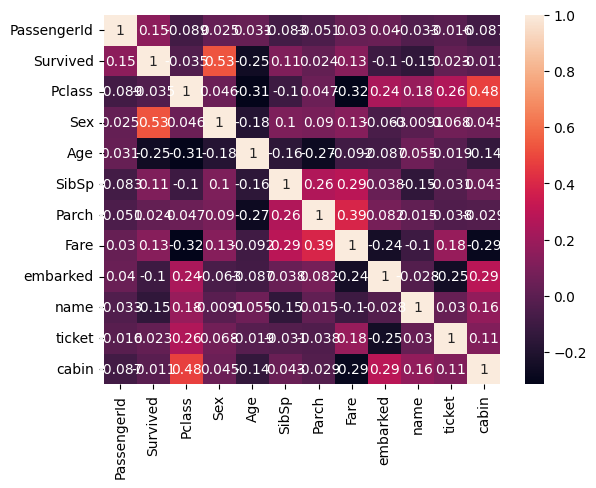

In [47]:
correlation = titanic_df_filtered.corr()
sns.heatmap(correlation, annot=True)

In [48]:
titanic_df_filtered = titanic_df_filtered.drop(columns=['cabin','ticket'])
titanic_df_filtered

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked,name
1,2,1,1,2,38.0,1,0,71.2833,0,49
3,4,1,1,2,35.0,1,0,53.1000,2,70
6,7,0,1,1,54.0,0,0,51.8625,2,112
10,11,1,3,2,4.0,1,1,16.7000,2,148
11,12,1,1,2,58.0,0,0,26.5500,2,27
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,2,47.0,1,1,52.5542,2,18
872,873,0,1,1,33.0,0,0,5.0000,2,35
879,880,1,1,2,56.0,0,1,83.1583,0,140
887,888,1,1,2,19.0,0,0,30.0000,2,75


<Axes: >

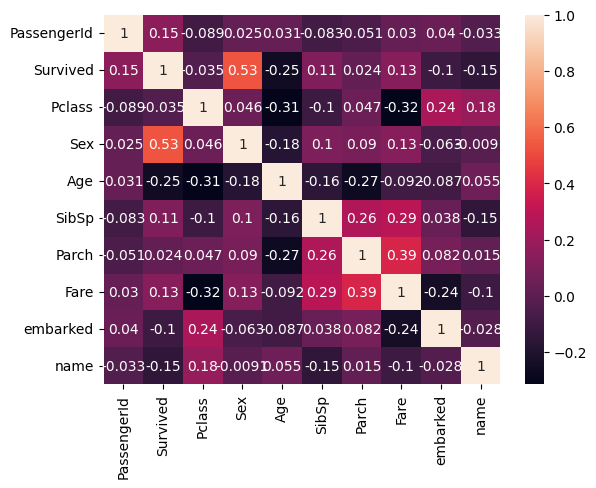

In [49]:
correlation = titanic_df_filtered.corr()
sns.heatmap(correlation, annot=True)

In [50]:
X = titanic_df_filtered[['Sex','Fare']]
y = titanic_df_filtered['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)
regression = LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_predict = regression.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [52]:
accuracy = regression.score(X_test,y_test)
accuracy

0.6756756756756757